In [445]:
using Plots
using JLD
using StatsPlots
using LaTeXStrings
using Statistics

In [446]:
include("../src/FCSeqTools.jl");
include("../src/functions.jl");

### Select Models:

In [447]:
## SELECT MODEL 1 ############################################################################
"""
method1 = "cumulative"
test1 = "main_test"
fraction1 = 0.3
stop1 = 0.9
α1 = 0.05 # pseudo count 
init_pseudo_count1 = 0.01
notebook1 = 1
model1 = "EAA_(" * string(α1) * "_" * string(init_pseudo_count1) * "_" * "nb" * string(notebook1) * ")";
"""


folder_zamponi1 = "new_algo"
tipo1 = "act" # "dec" 
sparsity1 = "0.70"
model_zamponi1 = "FZ_Parameters_conv_" * tipo1 * "CM"* sparsity1 * ".dat"
model1 = "FZ_" * model_zamponi1[20:end-4];


## SELECT MODEL 2 ############################################################################

method2 = "cumulative"
test2 = "main_test"
fraction2 = 0.3
stop2 = 0.9
α2 = 0.9
init_pseudo_count2 = 0.01
notebook2 = 1
model2 = "EAA_(" * string(α2) * "_" * string(init_pseudo_count2) * "_" * "nb" * string(notebook2) * ")";


"""
folder_zamponi2 = "new_algo"
tipo2 = "dec" # "act" 
sparsity2 = "0.98"
model_zamponi2 = "FZ_Parameters_conv_"* tipo2 *"CM"* sparsity2 * ".dat"
model2 = "FZ_" * model_zamponi2[20:end-4];
"""


"folder_zamponi2 = \"new_algo\"\ntipo2 = \"dec\" # \"act\" \nsparsity2 = \"0.98\"\nmodel_zamponi2 = \"FZ_Parameters_conv_\"* tipo2 *\"CM\"* sparsity2 * \".dat\"\nmodel2 = \"FZ_\" * model_zamponi2[20:end-4];\n"

### Create Folder:

In [448]:
folder_name = model1*"_vs_"*model2
alignment = "CM_alignment"

rm(joinpath("figures/"* alignment * "/comparison_models",folder_name), force=true, recursive=true)
mkdir(joinpath("figures/"* alignment * "/comparison_models",folder_name))
path = joinpath("figures/"* alignment * "/comparison_models",folder_name);

L, q = 96, 21;
Nij_tot = L * (L - 1) /2
Nij_ab_tot = Nij_tot * q^2;

### Extract Data:

In [449]:
## model 1  ############################################################################################################

if model1[1:3] == "EAA"
    folder1 = "../training/" * alignment * "/" * method1 * "/" * test1 * "/"
    path1 = folder1*method1*string(fraction1)*"_stop="*string(stop1) *"_reg="*string(α1) *"_nb"*string(notebook1)
    println(path1)

    h1 = JLD.load(path1* "/h.jld")["data"]
    Jij1 = JLD.load(path1* "/Jij.jld")["data"]
    iteration1 = open(path1* "/iterations.txt", "r")
    data1 = parse.(Float64, split(readlines(iteration1)[end], " ")[1:end-1])
    edge_n1, element_n1 = data1[6], data1[7]
    edge_n11, element_n1 = count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3))), count(!iszero, Jij1)

elseif model1[1:2] == "FZ"
    filepath1 = "../saved_models/Francesco_Zamponi/"* folder_zamponi1 * "/"*model_zamponi1;
    Jij1, h1 = read_model(filepath1);
    edge_n1, element_n1 = count(!iszero, sum(abs.(Jij1[:,:,i]) for i in 1:size(Jij1, 3))), count(!iszero, Jij1)

end;



## model 2 ############################################################################################################

if model2[1:3] == "EAA"
    folder2 = "../training/" * alignment * "/" * method2 * "/" * test2 * "/"
    path2 = folder2*method2*string(fraction2)*"_stop="*string(stop2) *"_reg="*string(α2) *"_nb"*string(notebook2)

    h2 = JLD.load(path2* "/h.jld")["data"]
    Jij2 = JLD.load(path2* "/Jij.jld")["data"]
    iteration2 = open(path2* "/iterations.txt", "r")
    data2 = parse.(Float64, split(readlines(iteration2)[end], " ")[1:end-1])
    edge_n2, element_n2 = data2[6], data2[7]
    edge_n22, element_n2 = count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3))), count(!iszero, Jij2)
    if edge_n2 == edge_n22
        println("ok")
    end
    
elseif model2[1:2] == "FZ"
    filepath2 = "../saved_models/Francesco_Zamponi/"* folder_zamponi2 * "/" * model_zamponi2;
    Jij2, h2 = read_model(filepath2);
    edge_n2, element_n2 = count(!iszero, sum(abs.(Jij2[:,:,i]) for i in 1:size(Jij2, 3))), count(!iszero, Jij2)

end;

ok


### Scatter Plot of all the Jijs:

In [450]:
n_element_plot = 50_000
Jij1_to_plot = zeros(n_element_plot);
Jij2_to_plot = zeros(n_element_plot);

for i in 1:n_element_plot
    j = rand(1:length(Jij1))
    Jij1_to_plot[i] = Jij1[j]
    Jij2_to_plot[i] = Jij2[j]
end

scatter(Jij1_to_plot, Jij2_to_plot, markershape=:circle, label=:false, xlabel="Jij(a,b) ("*model1*")", ylabel="Jij(a,b) ("*model2*")", title="Couplings nb.1 vs nb.2", alpha=0.2)
savefig(joinpath(path,"All_the_Jij1_vs_Jij2.png"));

### Count J_ijs in common and plot the distributions:

In [451]:
Jij_plot_1 = Jij1
Jij_plot_2 = Jij2

# count edges/elements in common
n_ij, n_ij_ab, n_01, n_10, n_00, Jij_common1, Jij_common2 = count_common_Jij(Jij_plot_1, Jij_plot_2);
frac_ij_tot = round(n_ij/Nij_tot * 100, digits=2)
frac_ijab_tot = round(n_ij_ab/Nij_ab_tot * 100, digits=2)
# compute the complexity
complex_edge1 = round(count(!iszero, sum(abs.(Jij_plot_1[:,:,i]) for i in 1:size(Jij1, 3)))/Nij_tot*100, digits=2)
complex_edge2 = round(count(!iszero, sum(abs.(Jij_plot_2[:,:,i]) for i in 1:size(Jij2, 3)))/Nij_tot*100, digits=2)

complex_element1 = round(count(!iszero, Jij_plot_1)/Nij_ab_tot*100, digits=2)
complex_element2 = round(count(!iszero, Jij_plot_2)/Nij_ab_tot*100, digits=2)

# fractions wrt model 1 
if model1[1:3] == "EAA"
    frac_ij_1 = round(n_ij/edge_n1 * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/element_n1 * 100, digits=2)

elseif model1[1:2] == "FZ"
    J1 = zeros(L, L)
    for i ∈ 1:L
        for j ∈ 1:L
                J1[i, j] = sum(abs.(Jij1[i, j, :]))
        end
    end
    frac_ij_1 = round(n_ij/count(!iszero, J1) * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/count(!iszero, Jij_plot_1) * 100, digits=2)

    frac_ij_1 = round(n_ij/edge_n1 * 100, digits=2)
    frac_ijab_1 = round(n_ij_ab/element_n1 * 100, digits=2)
    
end


# fractions wrt model 2 
if model2[1:3] == "EAA"
    frac_ij_2 = round(n_ij/edge_n2 * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/element_n2 * 100, digits=2)

elseif model2[1:2] == "FZ"
    J2 = zeros(L, L)
    for i ∈ 1:L
        for j ∈ 1:L
                J2[i, j] = sum(abs.(Jij2[i, j, :]))
        end
    end
    frac_ij_2 = round(n_ij/count(!iszero, J2) * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/count(!iszero, Jij_plot_2) * 100, digits=2)

    frac_ij_2 = round(n_ij/edge_n2 * 100, digits=2)
    frac_ijab_2 = round(n_ij_ab/element_n2 * 100, digits=2)
end;

println(edge_n1 / Nij_tot, " ", n_ij / edge_n2)
println(edge_n1, Nij_tot)

### WRITE ON FILE ################################################################################################################################################
filename = "count_common_Jij"
open(joinpath(path, filename), "w") do f  
       println("Edge Complexity model 1: ",complex_edge1,"%;    Edge Complexity model 2: ",complex_edge2, "%")
       write(f,"Edge Complexity model 1: $(complex_edge1)%;    Edge Complexity model 2:    $(complex_edge2)%;   ")
       
       println("\nElement Complexity model 1: ",complex_element1,"%;    Element Complexity model 2: ",complex_element2, "%")
       write(f,"\nElement Complexity model 1: $(complex_element1)%;    Element Complexity model 2:    $(complex_element2)%;   ")

       println("______________________________________________________________________________________________________________________________________________________")
       println("\nCommon Edges: \n",frac_ij_tot,"% of the total (L^2);   ", frac_ij_1, "% of the nonzeros of model 2;   ", frac_ij_2, "% of the nonzeros of model 2")
       write(f,"\nCommon Edges: \n $(frac_ij_tot)% of the total;   $(frac_ij_1)% of the first model;   $(frac_ij_2)% of the second model")

       println("\nCommon Elements: \n",frac_ijab_tot,"% of the total (L^2*q^2);   ",  frac_ijab_1, "% of the nonzeros in model 1;   ", frac_ijab_2, "% of the nonzeros of model 2")
       write(f,"\nCommon Elements: \n $(frac_ijab_tot)% of the total;   $(frac_ijab_1)% of the first model;   $(frac_ijab_2)% of the second model")

       println("______________________________________________________________________________________________________________________________________________________")
       println("\nNumber of cases where  J_1 != 0  &&  J_2 != 0: ", n_ij_ab)
       write(f,"\nNumber of cases where  J_1 != 0  &&  J_2 != 0: $n_ij_ab")

       println("\nNumber of cases where  J_1 == 0  &&  J_2 != 0: ", n_01)
       write(f,"\nNumber of cases where  J_1 == 0  &&  J_2 != 0: $n_01")

       println("\nNumber of cases where  J_1 != 0  &&  J_2 == 0: ", n_10)
       write(f,"\nNumber of cases where  J_1 != 0  &&  J_2 == 0: $n_10")

       println("\nNumber of cases where  J_1 == 0  &&   J_2 == 0: ", n_00)
       write(f,"\nNumber of cases where  J_1 == 0  &&   J_2 == 0: $n_00")
       println("______________________________________________________________________________________________________________________________________________________")
end
##################################################################################################################################################################

# Plot Scatter & Distributions #####################################################################################
x, y = Jij_common1[Jij_common1.!= 0.0], Jij_common2[Jij_common2.!= 0.0]
x_label, y_label = "Jij(a,b) "*model1, "Jij(a,b) "*model2 # (EAA 0.5)", "Jij(a,b)"*model_zamponi
title = "Common Couplings: "* L"J_{ij}(a,b)"


plot(  histogram(x, nbins=100, alpha=0.5, orientation=:vertical,label=:false, xticks=[], ylabel="counts", title = title),   
       plot(framestyle = :none),
       scatter(x, y, markershape=:circle, label=:false, xlabel=x_label, ylabel=y_label, alpha=0.2),
       histogram(y, nbins=100, alpha=0.5, orientation=:horizontal, label=:false, yticks=[], xlabel="counts"),
       link = :both, 
       size=(1000, 1000), 
       spacing=0.1, 
       )
savefig(joinpath(path,"Common_Jij1_vs_Jij2.png"));
##################################################################################################################

1.0 1.0
45604560.0
Edge Complexity model 1: 100.0%;    Edge Complexity model 2: 51.84%

Element Complexity model 1: 29.67%;    Element Complexity model 2: 1.26%
______________________________________________________________________________________________________________________________________________________

Common Edges: 
51.84% of the total (L^2);   51.84% of the nonzeros of model 2;   100.0% of the nonzeros of model 2

Common Elements: 
1.23% of the total (L^2*q^2);   4.13% of the nonzeros in model 1;   97.16% of the nonzeros of model 2
______________________________________________________________________________________________________________________________________________________

Number of cases where  J_1 != 0  &&  J_2 != 0: 24649

Number of cases where  J_1 == 0  &&  J_2 != 0: 721

Number of cases where  J_1 != 0  &&  J_2 == 0: 571984

Number of cases where  J_1 == 0  &&   J_2 == 0: 1413606
__________________________________________________________________________________

#### Count and plot Jijs NOT in common

In [452]:
J_diff1 = Jij1[(Jij1.!= 0).*(Jij2.== 0)] 
J_diff2 = Jij2[(Jij2.!= 0).*(Jij1.== 0)]; 

In [453]:
histogram(J_diff1, bins = 100, title = "Jij of model1 not in common with model2", xlabel="values", ylabel="counts", label=:false)
savefig(joinpath(path,"Jij1_NOT_in_common_with_Jij2.png"));

In [454]:
histogram(J_diff2, bins = 100, title = "Jij of model2 not in common with model1", xlabel="values", ylabel="counts", label=:false)
savefig(joinpath(path,"Jij2_NOT_in_common_with_Jij2.png"));

### Common Jijs vs Score/Iterations:


In [455]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA"
    file_path1 = joinpath(path1, "example_output.txt");
    file_path2 = joinpath(path2, "example_output.txt");

    edges1, elements1, scores1 = read_example_output(file_path1);
    edges2, elements2, scores2 = read_example_output(file_path2);
end;

### Common Edges/Elements vs Cij score:

In [456]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA"
    n_edges, n_elements, n_edges_x, n_edges_y, n_elements_x, n_elements_y = compare_edges(edges1, elements1, edges2, elements2, L);

    scores_x = scores1 #scores2

    scatter(scores_x, n_elements./n_elements_x * 100, marker=:circle, markersize=3, label="elements", legend=:right)
    scatter!(scores_x, n_edges./n_edges_x * 100, marker=:circle, markersize=3, label="edges")
    plot!(scores_x, 90*ones(length(scores_x)), label="90%")
    plot!(scores_x, 50*ones(length(scores_x)), label="50%")
    xlabel!(L"C_{ij}" * " score")
    ylabel!("%")
    title!("Percentage of non-zero parameters in both models")
    savefig(joinpath(path,"number_shared_Jij_vs_Cij_score.png"))
end

In [457]:
if model1[1:3] == "EAA" && model2[1:3] == "EAA"
    scatter(1:length(n_elements), n_elements./n_elements_x * 100, marker=:circle, markersize=3, label="elements", legend=:right)
    scatter!(1:length(n_elements), n_edges./n_edges_x * 100, marker=:circle, markersize=3, label="edges")
    plot!(1:length(n_elements), 90*ones(length(n_elements)), label="90%")
    plot!(1:length(n_elements), 50*ones(length(n_elements)), label="50%")
    xlabel!("E.A.A. iteration")
    ylabel!("%")
    title!("Percentage of non-zero parameters in both models")
    savefig(joinpath(path,"number_shared_Jij_vs_iterations.png"));
end

### Comparing FZ models with EAA varying pseudo-count:

#### Activation:

In [464]:
alphas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

edge_complexity_FZ_dec = 97.08
edge_complexity_EAA = [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]

element_complexity_FZ_dec = 1.99
element_complexity_EAA = [1.89, 1.63, 1.48, 1.29, 1.23, 1.19, 1.14, 1.13, 1.13, 1.26]

common_edges =         [37.68, 36.01, 36.14, 34.98, 35.83, 37.3, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_FZ =  [38.81, 37.09, 37.23, 36.03, 36.91, 38.42, 39.39, 41.97, 45.47, 53.4]
common_edges_wrt_EAA = [99.94, 99.94, 99.94, 99.94, 99.88, 99.94, 100.0, 100.0, 100.0, 100.0]

common_elements =         [0.45, 0.45, 0.45, 0.45, 0.46, 0.47, 0.48, 0.49, 0.51, 0.57]
common_elements_wrt_FZ =  [22.7, 22.47, 22.82, 22.7, 22.95, 23.54, 23.96, 24.52, 25.5, 28.83]
common_elements_wrt_EAA = [23.96, 27.43, 30.66, 35.02, 37.1, 39.48, 41.92, 43.06, 44.93, 45.53];

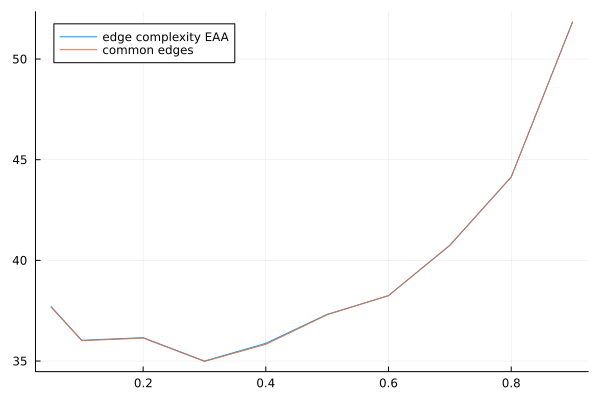

In [471]:
plot(alphas, edge_complexity_EAA, label="edge complexity EAA")
plot!(alphas, common_edges, label="common edges")

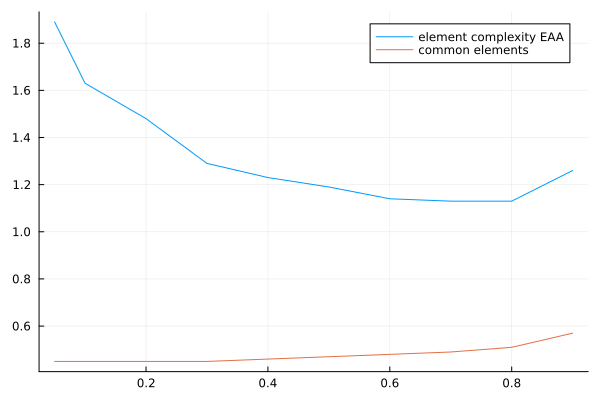

In [472]:
plot(alphas, element_complexity_EAA, label="element complexity EAA")
plot!(alphas, common_elements,  label="common elements")

#### Decimation:

In [461]:

edge_complexity_FZ_dec = 100
edge_complexity_EAA = [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]

element_complexity_FZ_dec = 2.96
element_complexity_EAA = [1.89, 1.63, ]

common_edges =         [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_FZ =  [37.7, 36.03, 36.16, 35.0, 35.88, 37.32, 38.25, 40.75, 44.14, 51.84]
common_edges_wrt_EAA = [100.0, ]

common_elements =         [0.41, ]
common_elements_wrt_FZ =  [13.88, ]
common_elements_wrt_EAA = [21.78, ];

In [462]:
21*21

441

In [463]:
for i in 1:0
    println(i)
end